In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

import numpy as np
import os

In [2]:
img_array=cv2.imread("D:/project_code_and_data/train/closed_eyes/s0003_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)



In [3]:
#cv2.cvtColor(img_array)
#gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

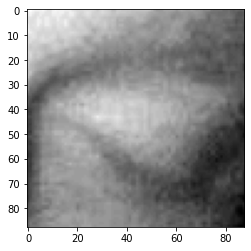

In [4]:
plt.imshow(img_array,cmap="gray")

In [5]:
img_array.shape

(88, 88)

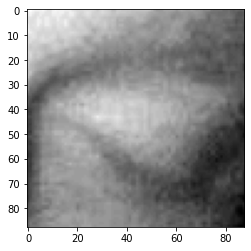

In [6]:
Datadirectory = "D:/project_code_and_data/train/" ## training dataset 
Classes = [ "closed_eyes","opened_eyes"] ## List of closses
#D:\project_code_and_data\train\closed_eyes
for category in Classes:
    path = os.path.join(Datadirectory, category) ## // 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [7]:
path

'D:/project_code_and_data/train/closed_eyes'

In [8]:
Classes

['closed_eyes', 'opened_eyes']

In [9]:
Datadirectory

'D:/project_code_and_data/train/'

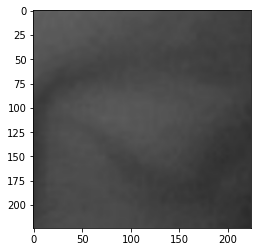

In [10]:
img_size= 224

new_array=cv2.resize(backtorgb, (img_size,img_size)) 
plt.imshow(new_array, cmap="gray")

plt.show()

##reading all images and converting them into an array for data and labels

In [11]:
training_Data =  []

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num = Classes.index(category)  
        for img in os.listdir(path):
            try: 
                img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB) 
                new_array =  cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

1361


In [14]:
import random

random.shuffle(training_Data) 

In [15]:
x=[]
y=[]

for features,label in training_Data:
    x.append(features)
    y.append(label)
    
x=np.array(x).reshape(-1,img_size,img_size,3)    

In [16]:
x.shape

(1361, 224, 224, 3)

In [17]:
x=x/225.0;

In [18]:
y=np.array(y)

In [19]:
import pickle

pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [20]:
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

In [21]:
##deep learning model for training

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model=tf.keras.applications.mobilenet.MobileNet()

In [24]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [25]:
#transfer learning

In [26]:
base_input=model.layers[0].input

In [27]:
base_output=model.layers[4].output

In [28]:

Flat_layer = layers.Flatten()(base_output) 
final_output =layers.Dense(1)(Flat_layer) ## one mode (1/0)

final_ouput =layers.Activation("sigmoid")(final_output)

In [29]:
new_model=keras.Model (inputs =base_input, outputs= final_output)


In [30]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                             

In [31]:
## setting for binary classification(open/closed)

In [32]:
new_model.compile(loss="binary_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [33]:
new_model.fit(x,y,epochs=1,validation_split=0.1)

39/39 [==============================] - 30s 529ms/step - loss: 8.1031 - accuracy: 0.4747 - val_loss: 8.1065 - val_accuracy: 0.4745


In [37]:
new_model.save('my_model.h5')

In [41]:
new_model=tf.keras.models.load_model('my_model.h5')

In [ ]:
#checking for network for prediction

In [43]:
img_arry=cv2.imread('s0003_00001_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [44]:
x_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [45]:
x_input.shape

(1, 224, 224, 3)

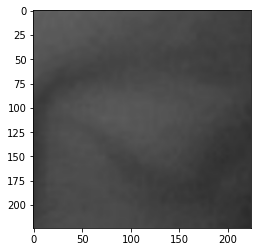

In [46]:
plt.imshow(new_array)

In [47]:
x_input=x_input/255.0

In [48]:
prediction=new_model.predict(x_input)

1/1 [==============================] - 3s 3s/step


In [49]:
prediction #value are +ve=open eyes,-ve = closed eyes

array([[-19.491861]], dtype=float32)

In [ ]:
#let check on unknown images

In [136]:
img=cv2.imread('D:/project_code_and_data/women.png',1)
#cv2.IMREAD_GRAYSCALE

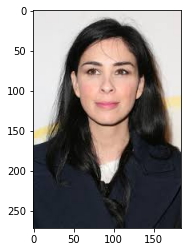

In [137]:
#plt.imshow(img,cmap="gray")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [138]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml' )

In [139]:
eye_Cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml' )

In [140]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [141]:
eyes = eye_Cascade.detectMultiScale(gray,1.1,4)

In [142]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

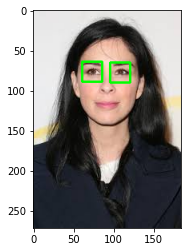

In [143]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [144]:
#croping the eye image


In [145]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades +  'haarcascade_eye.xml')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
eyes = eye_Cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("eyes not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]

In [146]:
eyes_roi.shape

(21, 21, 3)

In [147]:
final_image=cv2.resize(eyes_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [148]:
final_image.shape

(1, 224, 224, 3)

In [149]:
new_model.predict(final_image)

1/1 [==============================] - 0s 32ms/step


array([[-18.00643]], dtype=float32)

In [ ]:
#real time video demo

In [154]:
import cv2
path='haarcascade_frontalface_default.xml'
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml' )

cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame=cap.read()
    eye_Cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml' )
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    eyes = eye_Cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]
    final_image=cv2.resize(eyes_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    predictions=new_model.predict(final_image)
    if (predictions>0):
        status = "opened eyes"
    else:
        status = "closed eyes"
        
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    
    cv2.imshow("drowsiness detection",frame)
    if cv2.waitKey(2)&0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyALLWindows()

               
    

eyes not detected
eyes not detected
1/1 [==============================] - 0s 21ms/step
False
eyes not detected
1/1 [==============================] - 0s 25ms/step
False
1/1 [==============================] - 0s 23ms/step
False
eyes not detected
eyes not detected
1/1 [==============================] - 0s 21ms/step
False
eyes not detected
1/1 [==============================] - 0s 32ms/step
False
eyes not detected
eyes not detected
eyes not detected
1/1 [==============================] - 0s 25ms/step
False
eyes not detected


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
